<a href="https://colab.research.google.com/github/Jefffish09/MachineLearning/blob/dev/Classification/binary/mlp_tfidf_binary_tf2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, f1_score

In [2]:
seed = 2021
index_from = 3
input_dim = 5000
output_dim = 32
max_len = 200
batch_size = 64
epochs = 100
earlystopping_patience = 10

In [3]:
# Load the dataset

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=input_dim)

# Restore original text from imdb dataset
# https://stackoverflow.com/questions/42821330/restore-original-text-from-keras-s-imdb-dataset
word2idx = imdb.get_word_index()
word2idx = {k: (v+index_from) for k, v in word2idx.items()}
word2idx["<PAD>"] = 0
word2idx["<START>"] = 1
word2idx["<UNK>"] = 2
word2idx["<UNUSED>"] = 3
idx2word = {value: key for key,value in word2idx.items()}

x_train_pad_sequences = pad_sequences(x_train, maxlen=max_len, padding="post", truncating="pre")
x_test_pad_sequences = pad_sequences(x_test, maxlen=max_len, padding="post", truncating="pre")

x_train_words = [" ".join(idx2word[id] for id in sent) for sent in x_train_pad_sequences]
x_test_words = [" ".join(idx2word[id] for id in sent) for sent in x_test_pad_sequences]


17465344/17464789 [==============================] - 1s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])


1646592/1641221 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [4]:
# Preprocess the dataset

tfidf_vec = TfidfVectorizer(
    ngram_range=(1, 2),
    max_df=0.95,
    min_df=5,
    max_features=input_dim,
    sublinear_tf=True
)

x_train_tfidf = tfidf_vec.fit_transform(x_train_words).todense()
x_test_tfidf = tfidf_vec.transform(x_test_words).todense()


In [5]:
def plot_perf(history):
  # Create a plot of accuracy and loss over time
  history_dict = history.history
  history_dict.keys()

  acc = history_dict["accuracy"]
  val_acc = history_dict["val_accuracy"]
  loss = history_dict["loss"]
  val_loss = history_dict["val_loss"]

  epochs = range(1, len(acc) + 1)

  # Use plot styling from seaborn.
  sns.set(style="darkgrid")
  # Increase the plot size and font size.
  sns.set(font_scale=1.5)
  plt.rcParams["figure.figsize"] = (12, 6)

  # Training and validation loss
  plt.plot(epochs, loss, "r", label="Training loss")
  # b is for "solid blue line"
  plt.plot(epochs, val_loss, "b", label="Validation loss")
  plt.title("Training and validation loss")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

  # Training and validation accuracy
  plt.plot(epochs, acc, "r", label="Training acc")
  plt.plot(epochs, val_acc, "b", label="Validation acc")
  plt.title("Training and validation accuracy")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend(loc="lower right")
  plt.show()

KFold: 1 starts.
Epoch 1/100
352/352 [==============================] - 5s 6ms/step - loss: 0.4853 - accuracy: 0.7598 - val_loss: 0.2923 - val_accuracy: 0.8764
Epoch 2/100
352/352 [==============================] - 2s 4ms/step - loss: 0.2288 - accuracy: 0.9066 - val_loss: 0.3063 - val_accuracy: 0.8668
Epoch 3/100
352/352 [==============================] - 2s 4ms/step - loss: 0.1756 - accuracy: 0.9378 - val_loss: 0.3287 - val_accuracy: 0.8684
Epoch 4/100
352/352 [==============================] - 2s 4ms/step - loss: 0.1110 - accuracy: 0.9639 - val_loss: 0.3885 - val_accuracy: 0.8616
Epoch 5/100
352/352 [==============================] - 2s 4ms/step - loss: 0.0579 - accuracy: 0.9844 - val_loss: 0.4504 - val_accuracy: 0.8604
Epoch 6/100
352/352 [==============================] - 2s 4ms/step - loss: 0.0335 - accuracy: 0.9912 - val_loss: 0.5969 - val_accuracy: 0.8556
Epoch 7/100
352/352 [==============================] - 2s 4ms/step - loss: 0.0196 - accuracy: 0.9938 - val_loss: 0.6271 - val

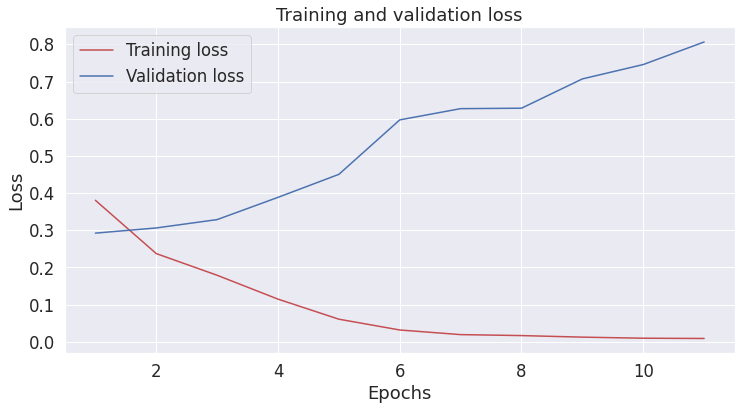

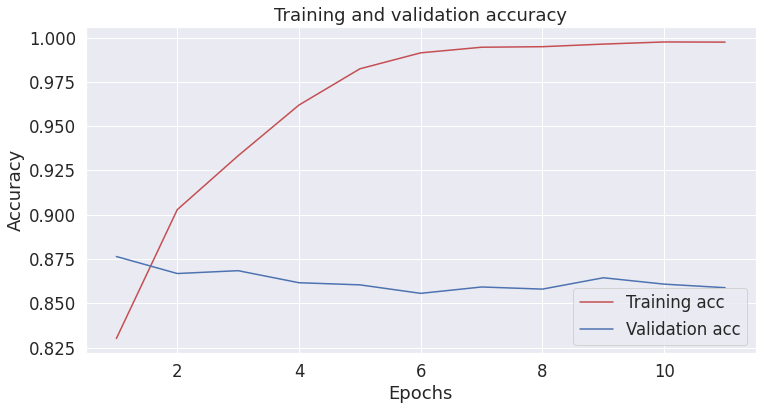

              precision    recall  f1-score   support

           0      0.892     0.859     0.875     12500
           1      0.864     0.896     0.880     12500

    accuracy                          0.878     25000
   macro avg      0.878     0.878     0.878     25000
weighted avg      0.878     0.878     0.878     25000


KFold: 2 starts.
Epoch 1/100
352/352 [==============================] - 2s 5ms/step - loss: 0.4892 - accuracy: 0.7568 - val_loss: 0.2916 - val_accuracy: 0.8812
Epoch 2/100
352/352 [==============================] - 2s 4ms/step - loss: 0.2308 - accuracy: 0.9114 - val_loss: 0.3036 - val_accuracy: 0.8700
Epoch 3/100
352/352 [==============================] - 2s 4ms/step - loss: 0.1733 - accuracy: 0.9392 - val_loss: 0.3455 - val_accuracy: 0.8588
Epoch 4/100
352/352 [==============================] - 2s 4ms/step - loss: 0.1101 - accuracy: 0.9639 - val_loss: 0.3869 - val_accuracy: 0.8612
Epoch 5/100
352/352 [==============================] - 2s 5ms/step - loss: 0.0619 -

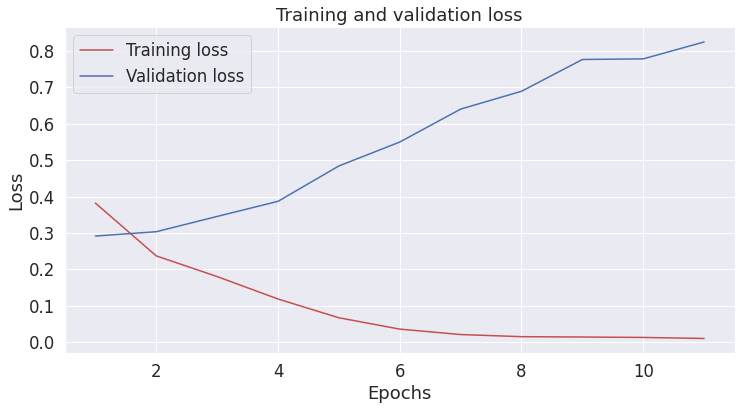

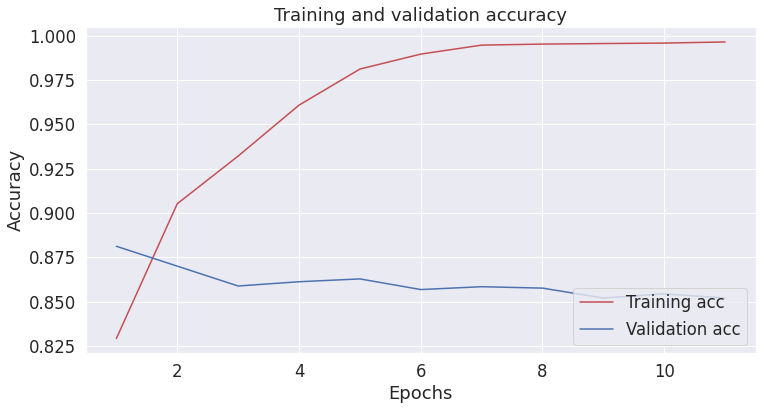

              precision    recall  f1-score   support

           0      0.876     0.886     0.881     12500
           1      0.884     0.874     0.879     12500

    accuracy                          0.880     25000
   macro avg      0.880     0.880     0.880     25000
weighted avg      0.880     0.880     0.880     25000


KFold: 3 starts.
Epoch 1/100
352/352 [==============================] - 2s 5ms/step - loss: 0.4832 - accuracy: 0.7616 - val_loss: 0.2807 - val_accuracy: 0.8840
Epoch 2/100
352/352 [==============================] - 2s 5ms/step - loss: 0.2272 - accuracy: 0.9088 - val_loss: 0.2965 - val_accuracy: 0.8804
Epoch 3/100
352/352 [==============================] - 2s 5ms/step - loss: 0.1668 - accuracy: 0.9389 - val_loss: 0.3352 - val_accuracy: 0.8676
Epoch 4/100
352/352 [==============================] - 2s 5ms/step - loss: 0.1061 - accuracy: 0.9649 - val_loss: 0.3690 - val_accuracy: 0.8668
Epoch 5/100
352/352 [==============================] - 2s 5ms/step - loss: 0.0587 -

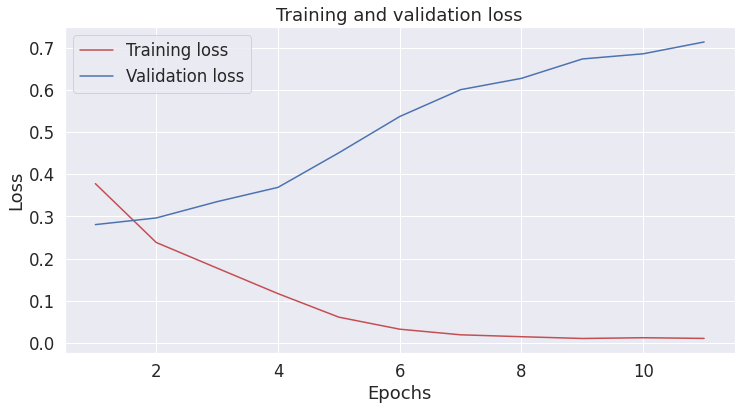

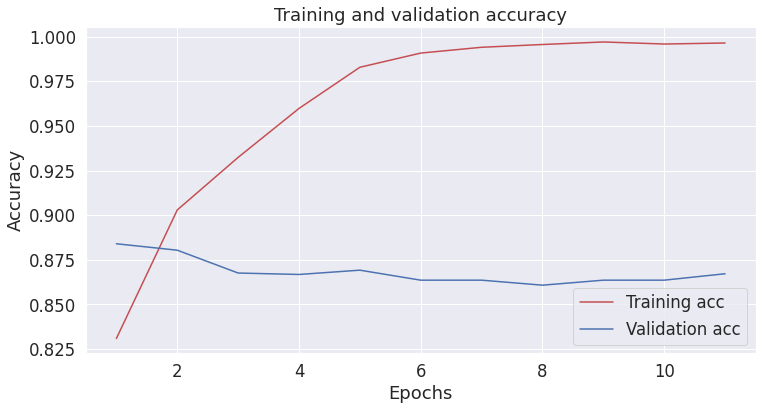

              precision    recall  f1-score   support

           0      0.879     0.877     0.878     12500
           1      0.877     0.880     0.878     12500

    accuracy                          0.878     25000
   macro avg      0.878     0.878     0.878     25000
weighted avg      0.878     0.878     0.878     25000


KFold: 4 starts.
Epoch 1/100
352/352 [==============================] - 2s 5ms/step - loss: 0.4888 - accuracy: 0.7676 - val_loss: 0.3037 - val_accuracy: 0.8688
Epoch 2/100
352/352 [==============================] - 2s 5ms/step - loss: 0.2248 - accuracy: 0.9106 - val_loss: 0.3202 - val_accuracy: 0.8608
Epoch 3/100
352/352 [==============================] - 2s 5ms/step - loss: 0.1657 - accuracy: 0.9404 - val_loss: 0.3446 - val_accuracy: 0.8652
Epoch 4/100
352/352 [==============================] - 2s 5ms/step - loss: 0.1111 - accuracy: 0.9640 - val_loss: 0.3993 - val_accuracy: 0.8640
Epoch 5/100
352/352 [==============================] - 2s 5ms/step - loss: 0.0598 -

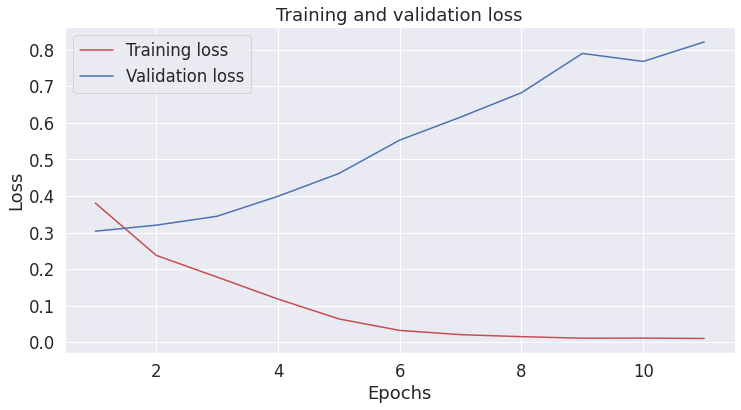

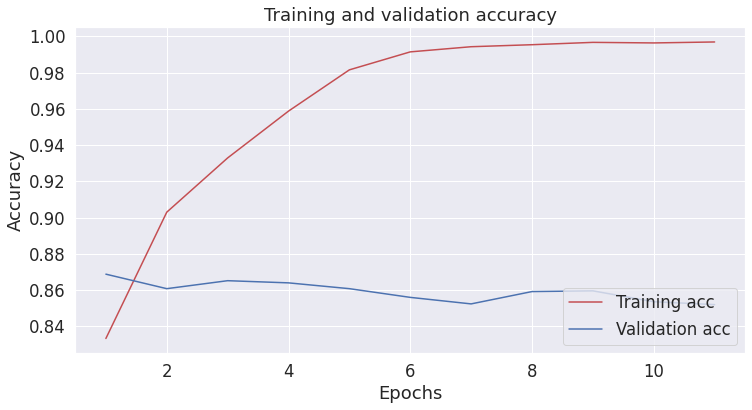

              precision    recall  f1-score   support

           0      0.868     0.890     0.879     12500
           1      0.887     0.865     0.876     12500

    accuracy                          0.877     25000
   macro avg      0.878     0.877     0.877     25000
weighted avg      0.878     0.877     0.877     25000


KFold: 5 starts.
Epoch 1/100
352/352 [==============================] - 3s 5ms/step - loss: 0.4914 - accuracy: 0.7661 - val_loss: 0.2941 - val_accuracy: 0.8648
Epoch 2/100
352/352 [==============================] - 2s 5ms/step - loss: 0.2304 - accuracy: 0.9103 - val_loss: 0.2993 - val_accuracy: 0.8652
Epoch 3/100
352/352 [==============================] - 2s 5ms/step - loss: 0.1705 - accuracy: 0.9374 - val_loss: 0.3133 - val_accuracy: 0.8580
Epoch 4/100
352/352 [==============================] - 2s 5ms/step - loss: 0.1148 - accuracy: 0.9617 - val_loss: 0.3703 - val_accuracy: 0.8604
Epoch 5/100
352/352 [==============================] - 2s 5ms/step - loss: 0.0618 -

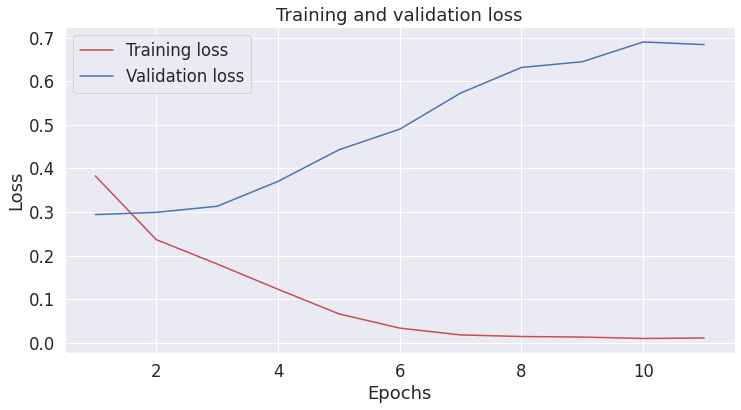

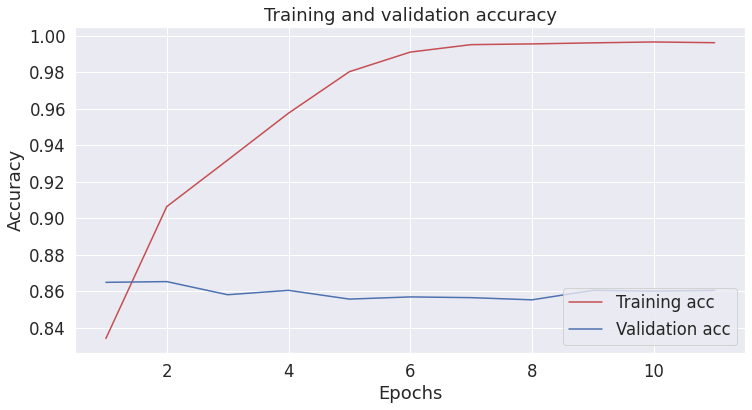

              precision    recall  f1-score   support

           0      0.882     0.875     0.878     12500
           1      0.876     0.883     0.879     12500

    accuracy                          0.879     25000
   macro avg      0.879     0.879     0.879     25000
weighted avg      0.879     0.879     0.879     25000


KFold: 6 starts.
Epoch 1/100
352/352 [==============================] - 2s 5ms/step - loss: 0.4834 - accuracy: 0.7795 - val_loss: 0.2833 - val_accuracy: 0.8768
Epoch 2/100
352/352 [==============================] - 2s 5ms/step - loss: 0.2317 - accuracy: 0.9094 - val_loss: 0.2936 - val_accuracy: 0.8744
Epoch 3/100
352/352 [==============================] - 2s 5ms/step - loss: 0.1650 - accuracy: 0.9380 - val_loss: 0.3217 - val_accuracy: 0.8708
Epoch 4/100
352/352 [==============================] - 2s 5ms/step - loss: 0.1109 - accuracy: 0.9625 - val_loss: 0.3741 - val_accuracy: 0.8624
Epoch 5/100
352/352 [==============================] - 2s 5ms/step - loss: 0.0615 -

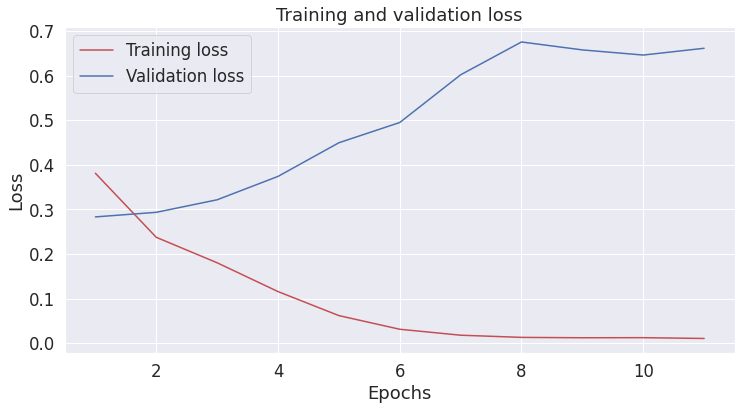

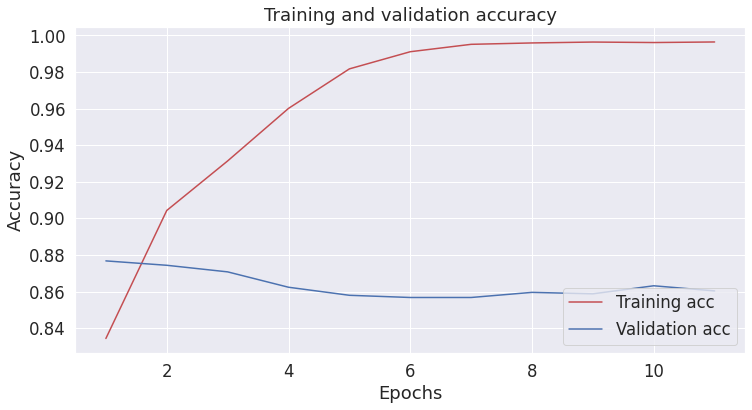

              precision    recall  f1-score   support

           0      0.898     0.844     0.870     12500
           1      0.853     0.905     0.878     12500

    accuracy                          0.874     25000
   macro avg      0.876     0.874     0.874     25000
weighted avg      0.876     0.874     0.874     25000


KFold: 7 starts.
Epoch 1/100
352/352 [==============================] - 2s 5ms/step - loss: 0.4870 - accuracy: 0.7616 - val_loss: 0.2910 - val_accuracy: 0.8788
Epoch 2/100
352/352 [==============================] - 2s 5ms/step - loss: 0.2269 - accuracy: 0.9100 - val_loss: 0.3174 - val_accuracy: 0.8724
Epoch 3/100
352/352 [==============================] - 2s 5ms/step - loss: 0.1696 - accuracy: 0.9380 - val_loss: 0.3495 - val_accuracy: 0.8664
Epoch 4/100
352/352 [==============================] - 2s 5ms/step - loss: 0.1063 - accuracy: 0.9664 - val_loss: 0.4118 - val_accuracy: 0.8692
Epoch 5/100
352/352 [==============================] - 2s 5ms/step - loss: 0.0560 -

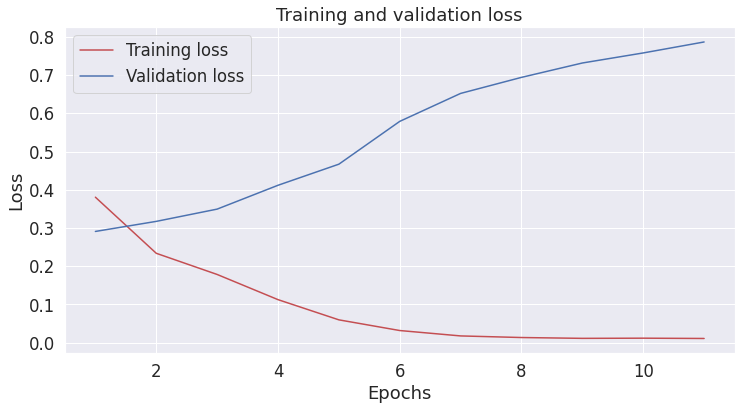

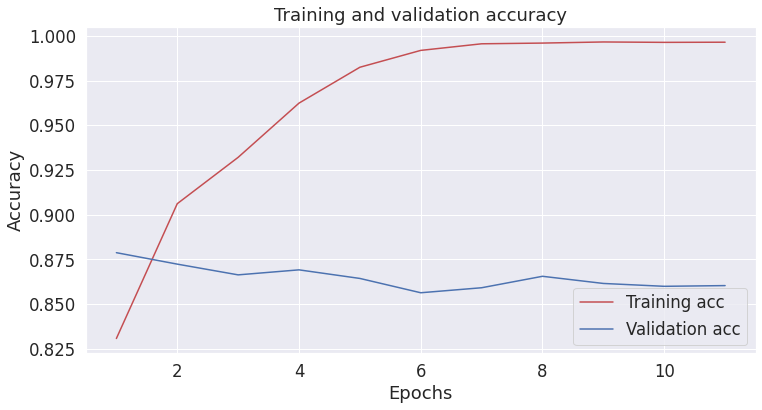

              precision    recall  f1-score   support

           0      0.890     0.863     0.876     12500
           1      0.867     0.894     0.880     12500

    accuracy                          0.878     25000
   macro avg      0.879     0.878     0.878     25000
weighted avg      0.879     0.878     0.878     25000


KFold: 8 starts.
Epoch 1/100
352/352 [==============================] - 2s 5ms/step - loss: 0.4883 - accuracy: 0.7652 - val_loss: 0.2858 - val_accuracy: 0.8768
Epoch 2/100
352/352 [==============================] - 2s 5ms/step - loss: 0.2304 - accuracy: 0.9084 - val_loss: 0.3093 - val_accuracy: 0.8772
Epoch 3/100
352/352 [==============================] - 2s 5ms/step - loss: 0.1709 - accuracy: 0.9349 - val_loss: 0.3205 - val_accuracy: 0.8732
Epoch 4/100
352/352 [==============================] - 2s 5ms/step - loss: 0.1082 - accuracy: 0.9662 - val_loss: 0.3471 - val_accuracy: 0.8768
Epoch 5/100
352/352 [==============================] - 2s 5ms/step - loss: 0.0600 -

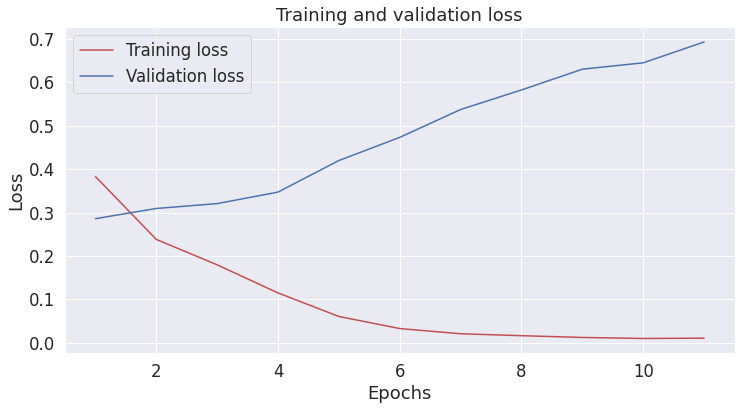

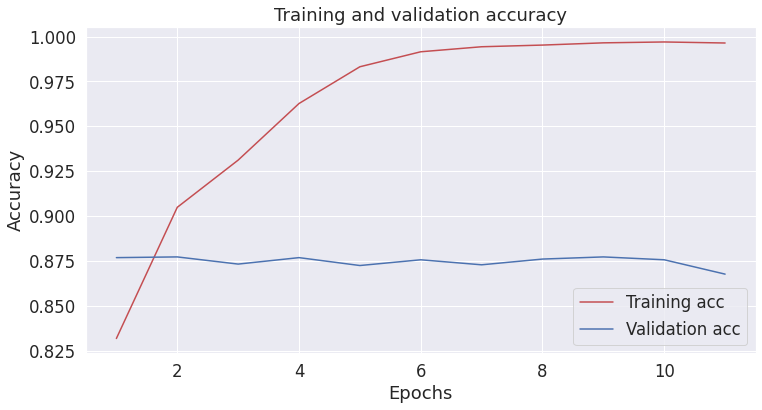

              precision    recall  f1-score   support

           0      0.899     0.855     0.876     12500
           1      0.862     0.904     0.882     12500

    accuracy                          0.879     25000
   macro avg      0.880     0.879     0.879     25000
weighted avg      0.880     0.879     0.879     25000


KFold: 9 starts.
Epoch 1/100
352/352 [==============================] - 3s 6ms/step - loss: 0.4887 - accuracy: 0.7545 - val_loss: 0.3209 - val_accuracy: 0.8604
Epoch 2/100
352/352 [==============================] - 2s 5ms/step - loss: 0.2346 - accuracy: 0.9074 - val_loss: 0.3090 - val_accuracy: 0.8724
Epoch 3/100
352/352 [==============================] - 2s 5ms/step - loss: 0.1659 - accuracy: 0.9403 - val_loss: 0.3372 - val_accuracy: 0.8668
Epoch 4/100
352/352 [==============================] - 2s 5ms/step - loss: 0.1116 - accuracy: 0.9635 - val_loss: 0.3888 - val_accuracy: 0.8580
Epoch 5/100
352/352 [==============================] - 2s 5ms/step - loss: 0.0592 -

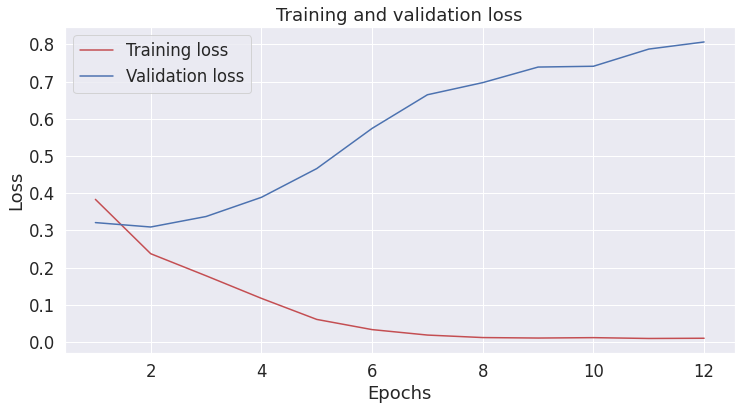

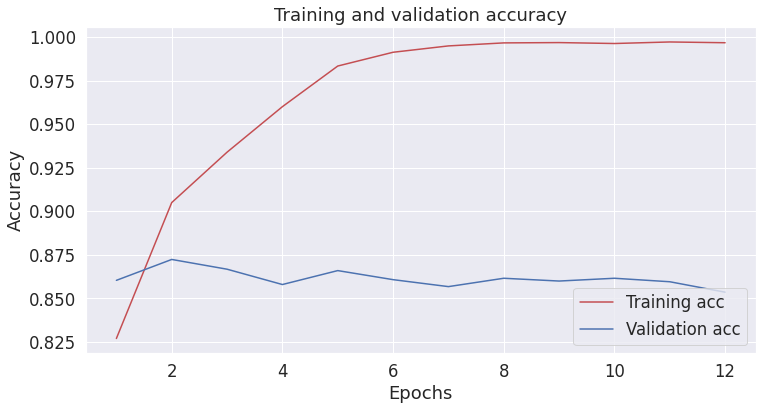

              precision    recall  f1-score   support

           0      0.878     0.874     0.876     12500
           1      0.875     0.879     0.877     12500

    accuracy                          0.876     25000
   macro avg      0.876     0.876     0.876     25000
weighted avg      0.876     0.876     0.876     25000


KFold: 10 starts.
Epoch 1/100
352/352 [==============================] - 2s 5ms/step - loss: 0.4890 - accuracy: 0.7603 - val_loss: 0.3222 - val_accuracy: 0.8612
Epoch 2/100
352/352 [==============================] - 2s 5ms/step - loss: 0.2256 - accuracy: 0.9107 - val_loss: 0.3051 - val_accuracy: 0.8732
Epoch 3/100
352/352 [==============================] - 2s 5ms/step - loss: 0.1665 - accuracy: 0.9376 - val_loss: 0.3503 - val_accuracy: 0.8660
Epoch 4/100
352/352 [==============================] - 2s 5ms/step - loss: 0.1081 - accuracy: 0.9667 - val_loss: 0.3857 - val_accuracy: 0.8588
Epoch 5/100
352/352 [==============================] - 2s 5ms/step - loss: 0.0524 

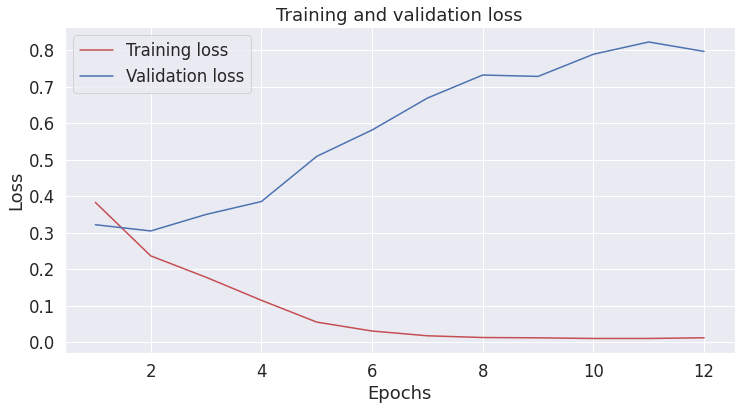

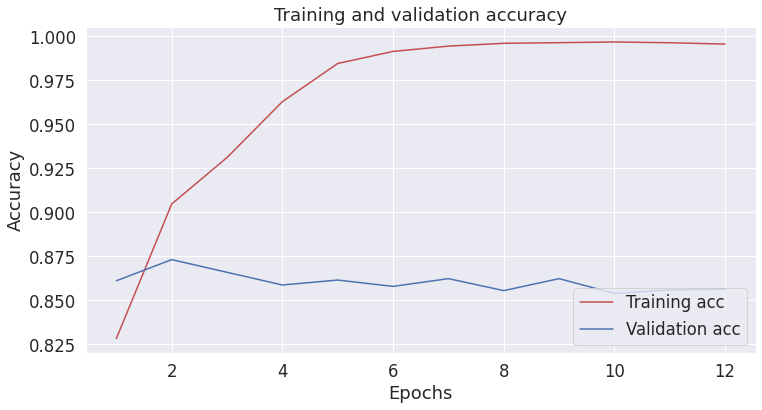

              precision    recall  f1-score   support

           0      0.864     0.888     0.876     12500
           1      0.885     0.861     0.873     12500

    accuracy                          0.874     25000
   macro avg      0.875     0.874     0.874     25000
weighted avg      0.875     0.874     0.874     25000


Average accuracy: 0.8775 (+/- 0.0018)
Average loss: 0.2876 (+/- 0.0028)
Average F1: 0.8782 (+/- 0.0025)


In [6]:
# Create and train the model

earlystop_callback = EarlyStopping(
  monitor="val_loss",
  min_delta=0.0001,
  patience=earlystopping_patience,
  restore_best_weights=True)

kfold = StratifiedKFold(n_splits=10, random_state=seed, shuffle=True)
model = None
cv_acc = []
cv_loss = []
cv_f1 = []

for n, (train, valid) in enumerate(kfold.split(x_train_tfidf, y_train)):

  print("KFold: {} starts.".format(n + 1))
  del model
  tf.keras.backend.clear_session()

  model = Sequential([
    Dense(units=150, activation="relu", input_shape=(input_dim,)),
    Dropout(rate=0.4),
    Dense(units=100, activation="relu"),
    Dropout(rate=0.4),
    # Output layer
    Dense(units=1, activation="sigmoid")
  ])

  model.compile(
      loss="binary_crossentropy",
      optimizer="adam",
      metrics=["accuracy"]
  )

  # model.summary()

  history = model.fit(
      x=x_train_tfidf[train],
      y=y_train[train],
      validation_data=(x_train_tfidf[valid], y_train[valid]),
      batch_size=batch_size,
      epochs=epochs,
      verbose=1,
      callbacks=[earlystop_callback]
  )

  loss, acc = model.evaluate(x=x_test_tfidf, y=y_test, verbose=1)
  cv_acc.append(acc)
  cv_loss.append(loss)

  plot_perf(history)

  # np.argmax(model.predict(x), axis=-1), if your model does multi-class classification (e.g. if it uses a softmax last-layer activation).
  # (model.predict(x) > 0.5).astype("int32"), if your model does binary classification (e.g. if it uses a sigmoid last-layer activation).
  y_pred = (model.predict(x_test_tfidf) > 0.5).astype("int32")
  report = classification_report(y_true=y_test, y_pred=y_pred, digits=3, output_dict=False)
  print(report)

  f1 = f1_score(y_true=y_test, y_pred=y_pred, average="binary")
  cv_f1.append(f1)

  print("")

print("Average accuracy: {:.4f} (+/- {:.4f})".format(np.mean(cv_acc), np.std(cv_acc)))
print("Average loss: {:.4f} (+/- {:.4f})".format(np.mean(cv_loss), np.std(cv_loss)))
print("Average F1: {:.4f} (+/- {:.4f})".format(np.mean(cv_f1), np.std(cv_f1)))
